In [107]:
#Ashref Bensaid
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [108]:
# importing or loading the dataset
dataset = pd.read_excel('cases.xls', index_col='Date', parse_dates=True)
dataset

,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
Date,,,,,,,,,
2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,1
2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,2
2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,2
2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2020-08-06,Telangana,18.1124,79.0193,73050,589,52103,2092,0,1289
2020-08-06,Tripura,23.9408,91.9882,5725,31,3793,97,0,68
2020-08-06,Uttar Pradesh,26.8467,80.9462,104388,1857,60558,4078,0,3287


In [109]:
dataset = dataset[['New cases']]
dataset.columns = ['cases']
dataset


,cases
Date,
2020-01-30,0
2020-01-31,0
2020-02-01,1
2020-02-02,1
2020-02-03,0
...,...
2020-08-06,2092
2020-08-06,97
2020-08-06,4078


<AxesSubplot:xlabel='Date'>

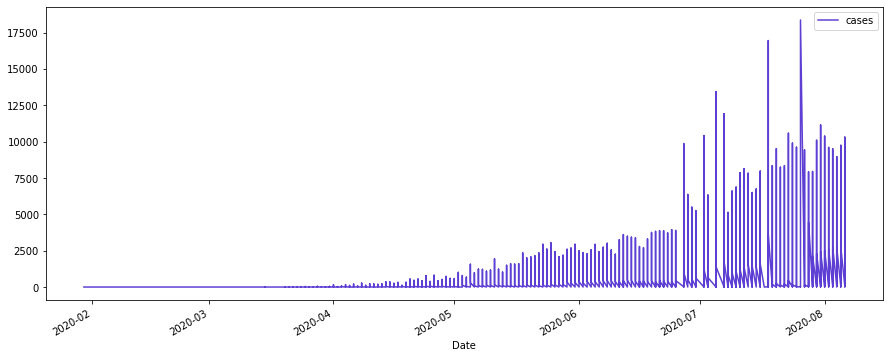

In [110]:
dataset.plot(color='#5D3FD3', figsize=(15,6))

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_dataset = scaler.fit_transform(dataset)

In [120]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 50
generator = TimeseriesGenerator(scaled_dataset, scaled_dataset, length=length, batch_size=1)

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [122]:
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(length, 1), return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(10, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary();

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 10)            480       
                                                                 
 dropout_6 (Dropout)         (None, 50, 10)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50, 20)            2480      
                                                                 
 dropout_7 (Dropout)         (None, 50, 20)            0         
                                                                 
 lstm_8 (LSTM)               (None, 10)                1240      
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [123]:
from tensorflow.keras.models import load_model

In [116]:
#model.fit(generator,epochs=100)


Epoch 1/100
4592/4592 [==============================] - 325s 70ms/step - loss: 0.0045
Epoch 2/100
4592/4592 [==============================] - 358s 78ms/step - loss: 0.0044
Epoch 3/100
4592/4592 [==============================] - 401s 87ms/step - loss: 0.0043
Epoch 4/100
4592/4592 [==============================] - 387s 84ms/step - loss: 0.0043
Epoch 5/100
2557/4592 [===============>..............] - ETA: 3:03 - loss: 0.0052

KeyboardInterrupt: 

In [124]:
#model.save('mfinal_external')
loaded_model = load_model('mfinal_external')

In [125]:
forecast = []
periods = 40
first_eval_batch = scaled_dataset[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))
for i in range(periods):
    current_pred = loaded_model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [126]:
forecast

[array([0.12924305], dtype=float32),
 array([0.12893842], dtype=float32),
 array([0.12825097], dtype=float32),
 array([0.127023], dtype=float32),
 array([0.1252628], dtype=float32),
 array([0.12306786], dtype=float32),
 array([0.12057715], dtype=float32),
 array([0.11834963], dtype=float32),
 array([0.11632231], dtype=float32),
 array([0.11446384], dtype=float32),
 array([0.1127247], dtype=float32),
 array([0.11113504], dtype=float32),
 array([0.10966554], dtype=float32),
 array([0.10830849], dtype=float32),
 array([0.10711132], dtype=float32),
 array([0.10566893], dtype=float32),
 array([0.10389375], dtype=float32),
 array([0.10188805], dtype=float32),
 array([0.09990501], dtype=float32),
 array([0.09786652], dtype=float32),
 array([0.09580806], dtype=float32),
 array([0.09370665], dtype=float32),
 array([0.09154542], dtype=float32),
 array([0.089314], dtype=float32),
 array([0.08700839], dtype=float32),
 array([0.08467899], dtype=float32),
 array([0.08233729], dtype=float32),
 array(

In [127]:
forecast = scaler.inverse_transform(forecast)

In [128]:
forecast_index = pd.date_range(start='2020-08-07',periods=periods,freq='D')

In [129]:
forecast_df = pd.DataFrame(data=forecast,
                           index=forecast_index,
                           columns=['Forecast'])

forecast_df

,Forecast
2020-08-07,2373.677784
2020-08-08,2368.083051
2020-08-09,2355.457341
2020-08-10,2332.904355
2020-08-11,2300.576527
2020-08-12,2260.264377
2020-08-13,2214.519920
2020-08-14,2173.609380
2020-08-15,2136.375523
2020-08-16,2102.242948


<AxesSubplot:xlabel='Date'>

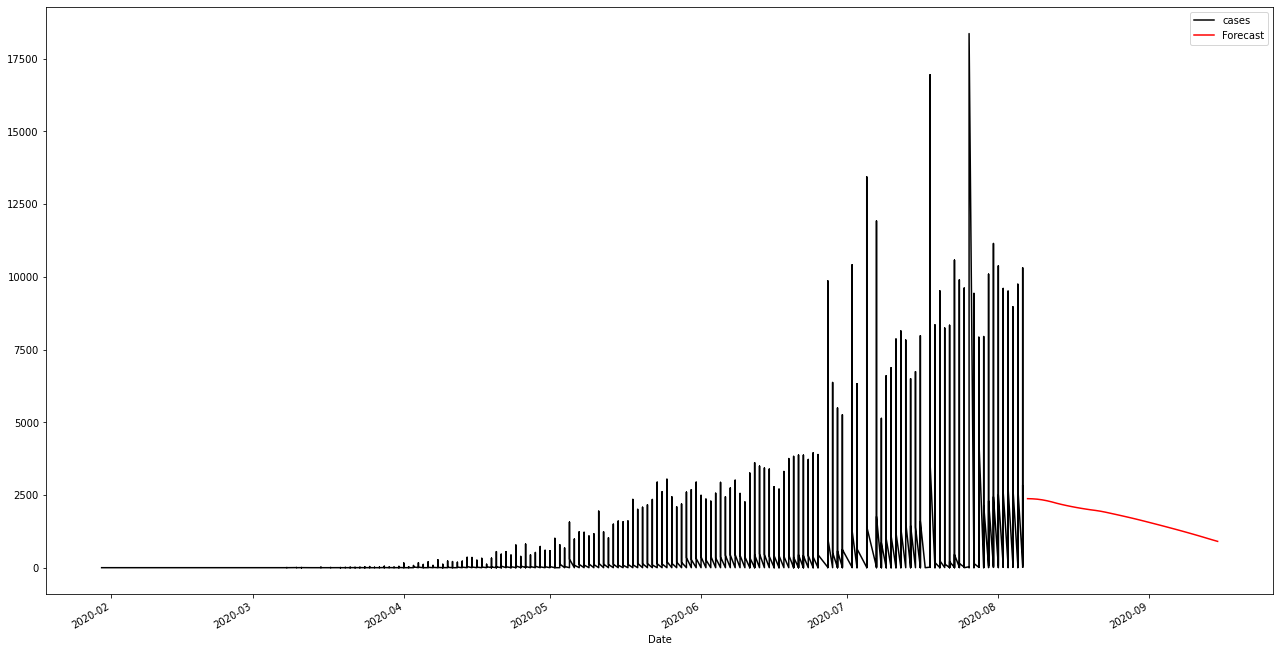

In [130]:
ax = dataset.plot(figsize=(22,12), color='black')
forecast_df.plot(ax=ax, color='red')